In [4]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [58]:
# Define the Autoencoder model for the MNIST dataset
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [59]:
# Load the MNIST dataset
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function and optimizer
model = Model()
model.to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Test the model
model.eval()
with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)
        output = model(img)
        loss = criterion(output, img)
    print('Test Loss: {:.4f}'.format(loss.item()))

Epoch [1/5], Loss: 0.1706
Epoch [2/5], Loss: 0.1631
Epoch [3/5], Loss: 0.1831
Epoch [4/5], Loss: 0.1680
Epoch [5/5], Loss: 0.1662
Test Loss: 0.1600


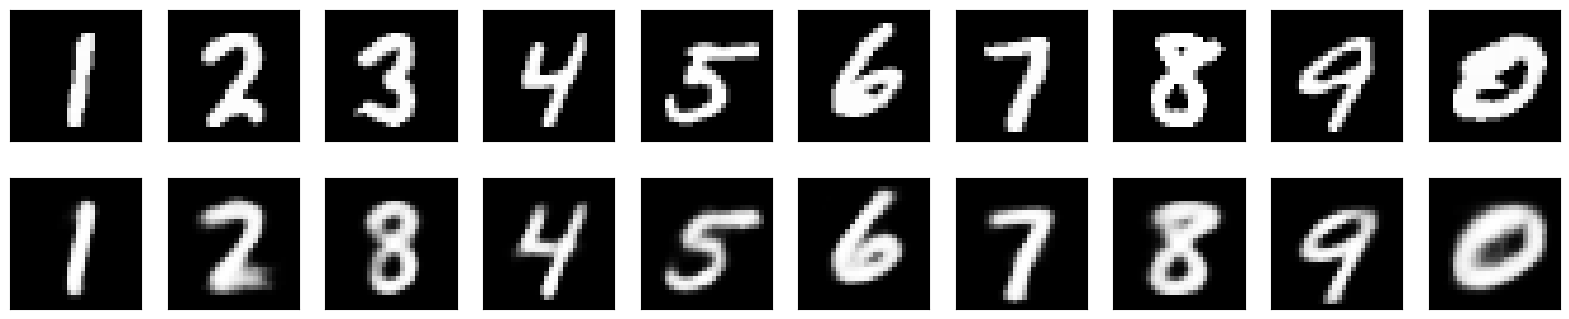

In [56]:
#visualize the results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    img_cpu = img.cpu()
    plt.imshow(img_cpu[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    output_cpu = output.cpu()
    plt.imshow(output_cpu[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Noise factor:  0.0


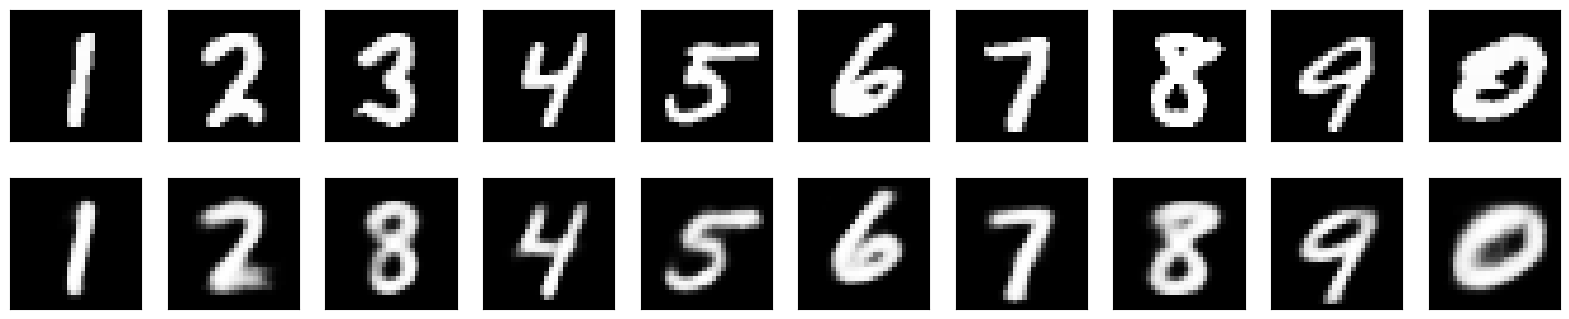

Noise factor:  0.05


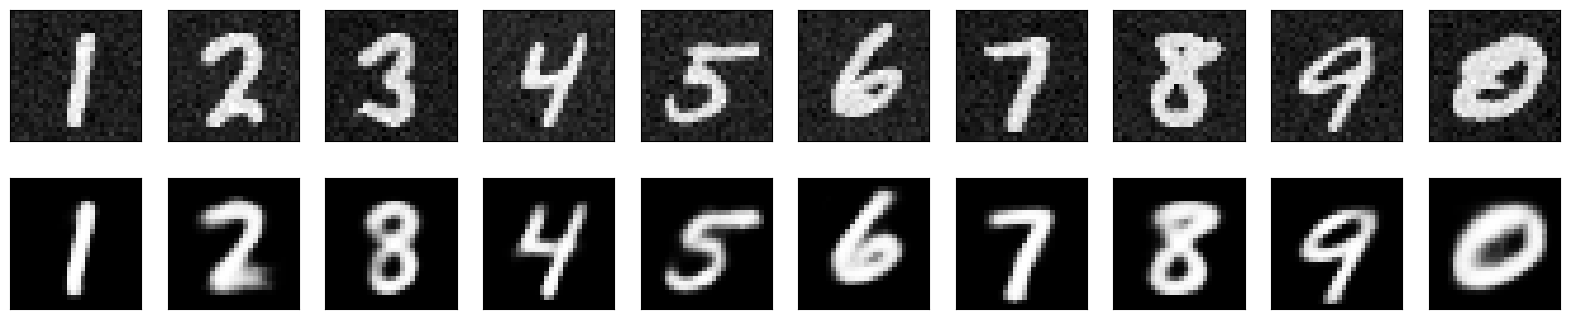

Noise factor:  0.1


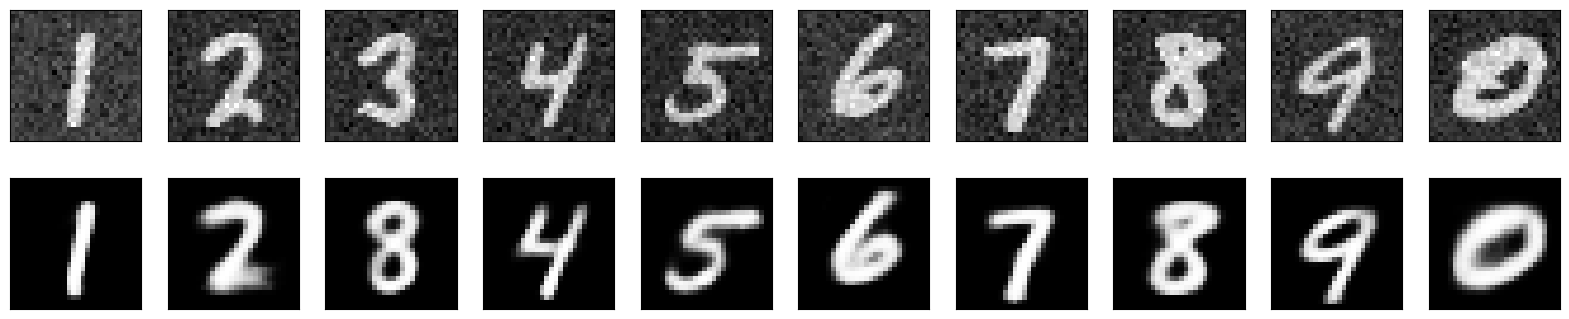

Noise factor:  0.15


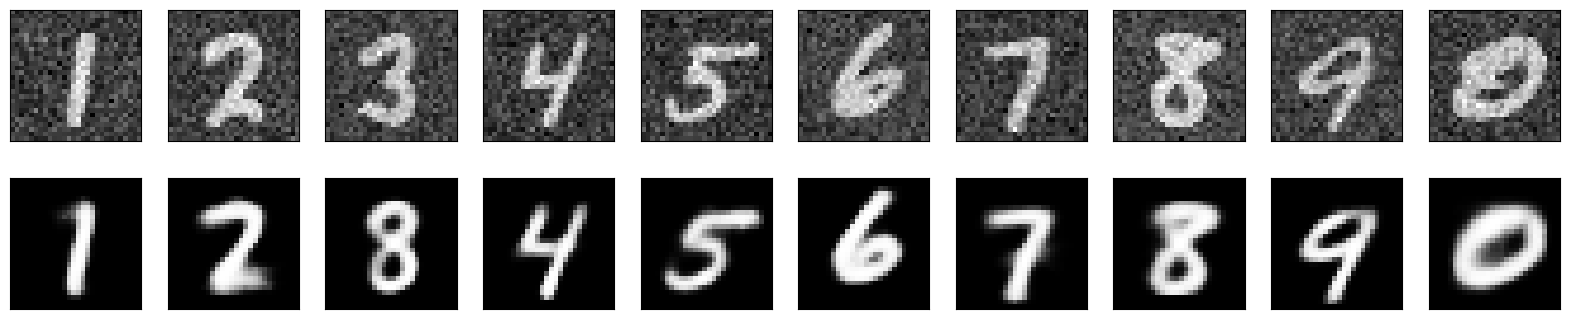

Noise factor:  0.2


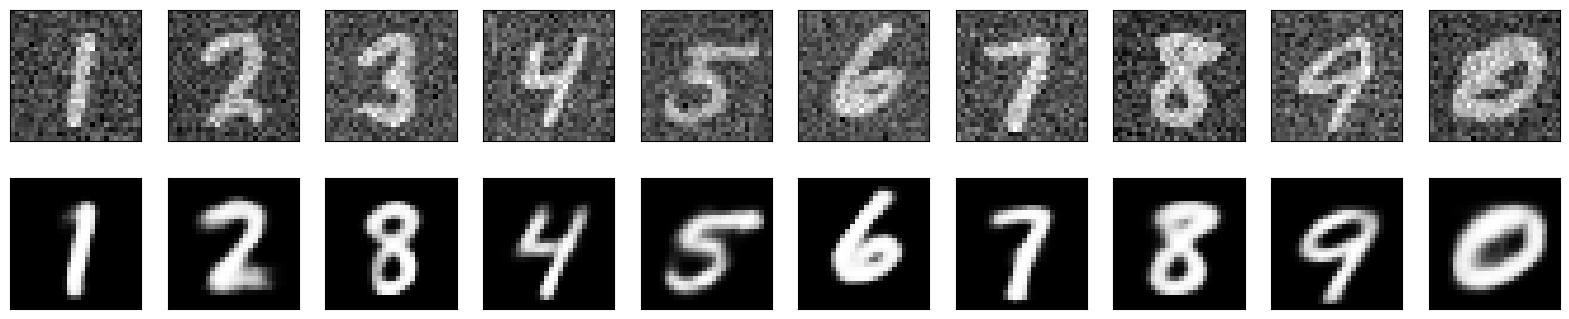

Noise factor:  0.25


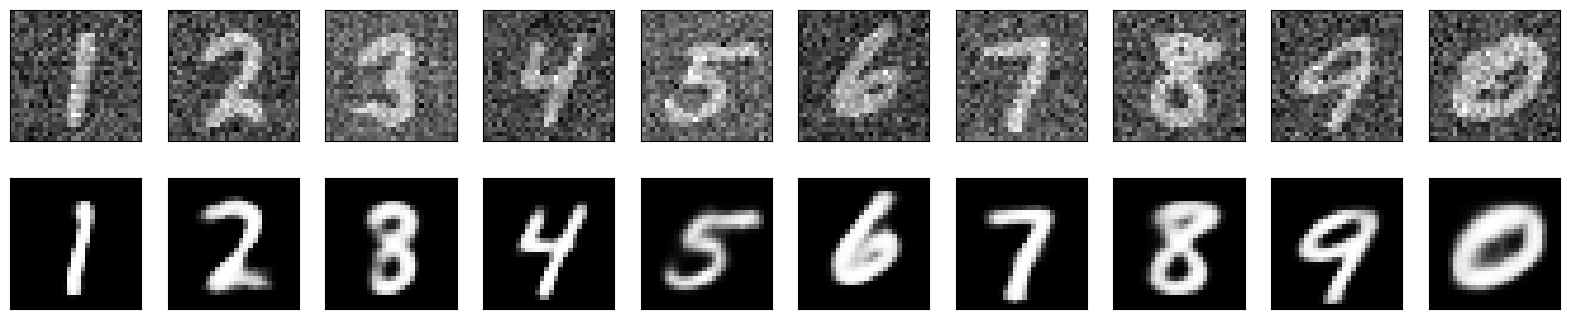

Noise factor:  0.3


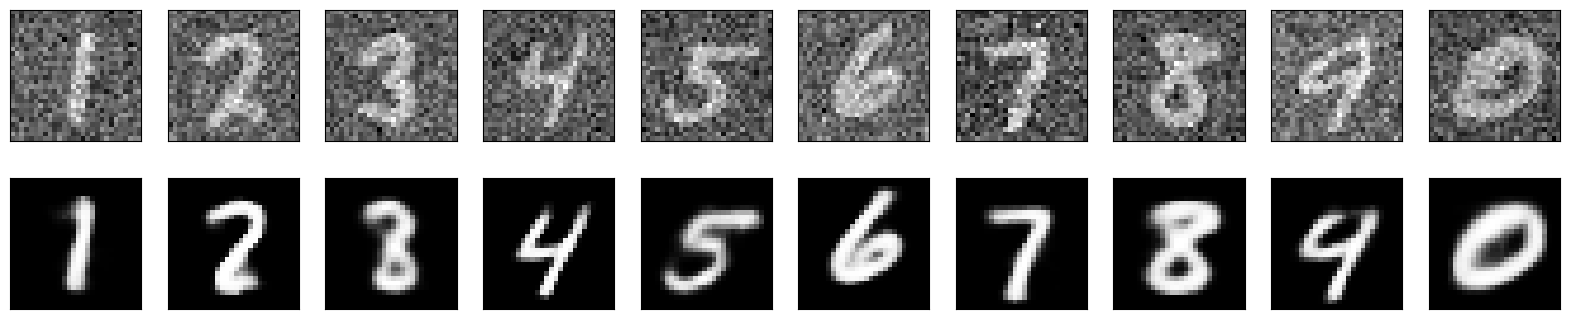

Noise factor:  0.35


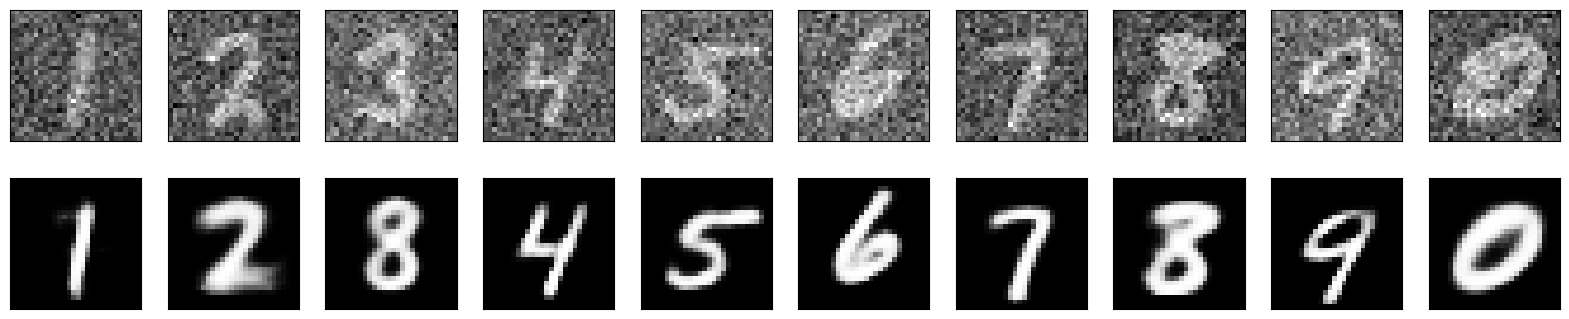

Noise factor:  0.4


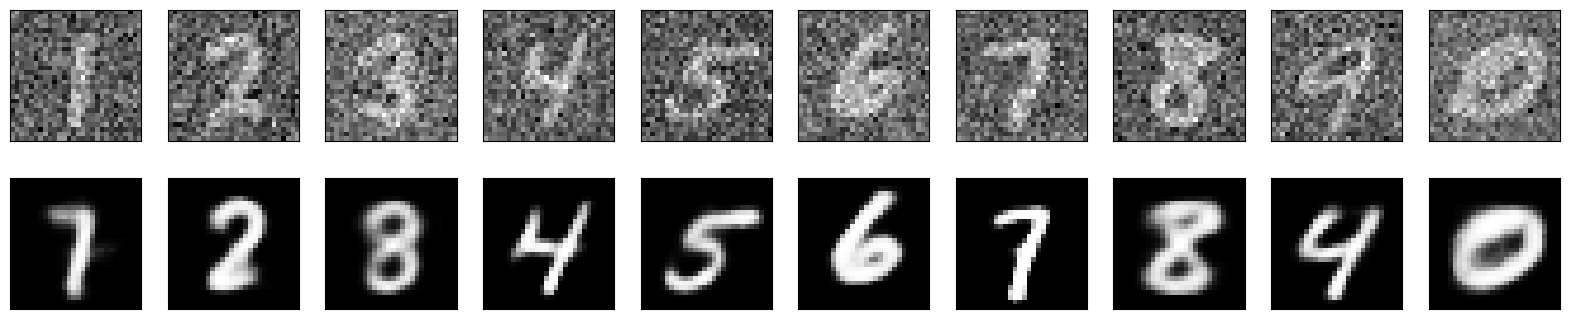

Noise factor:  0.45


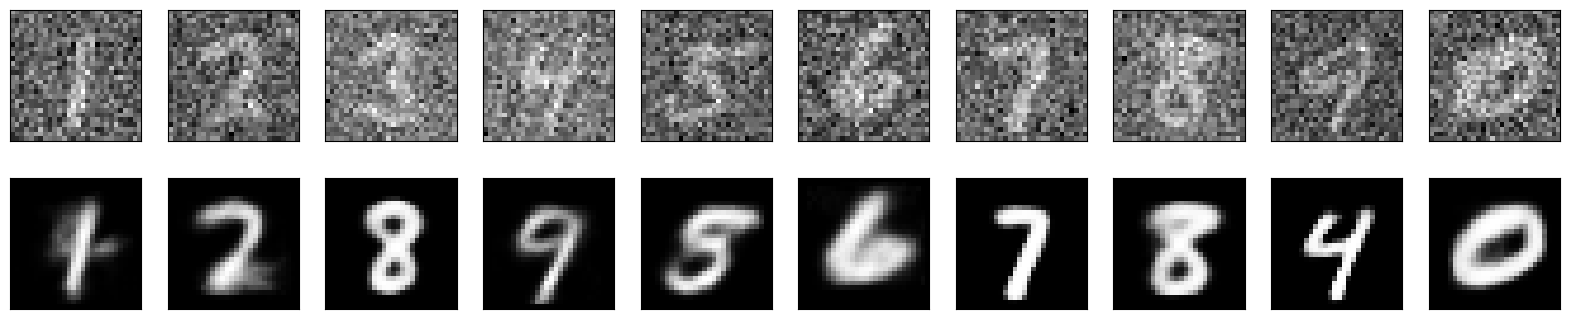

Noise factor:  0.5


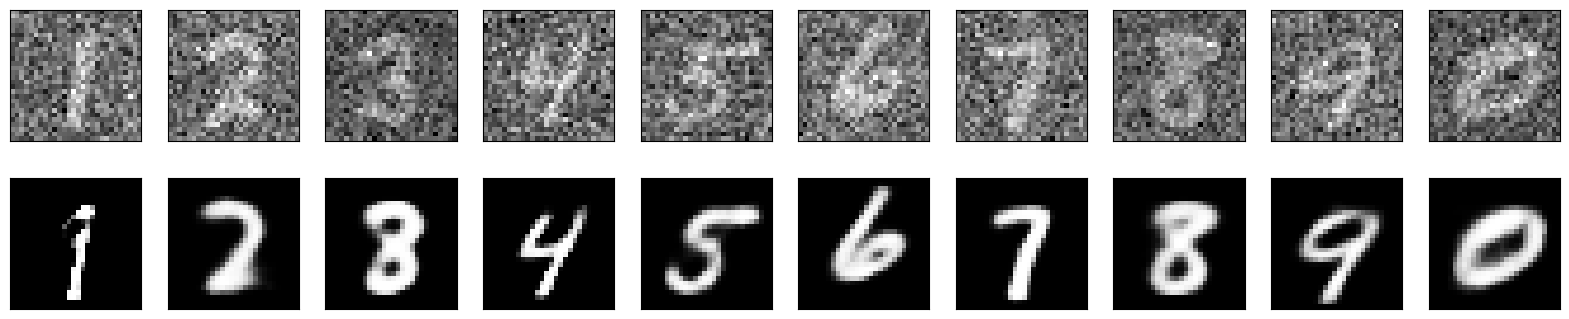

Noise factor:  0.55


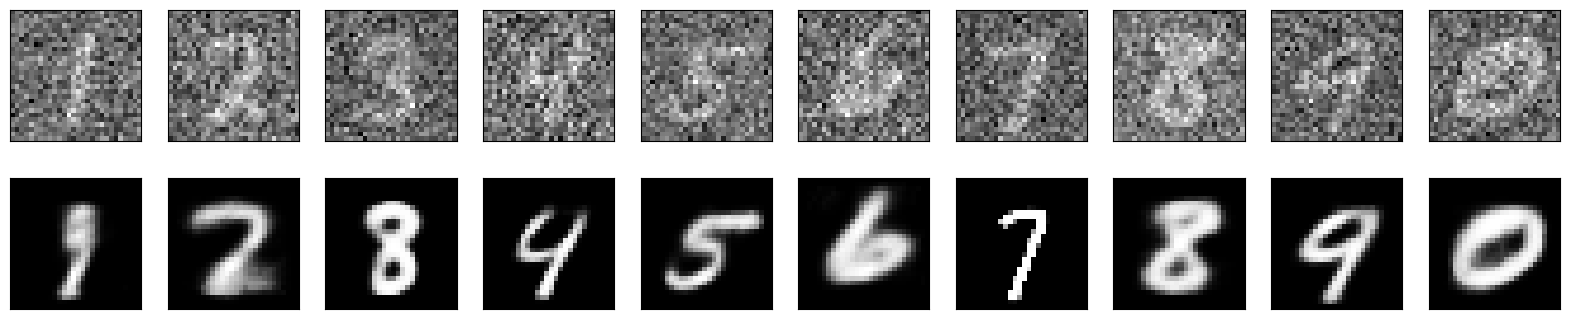

Noise factor:  0.6


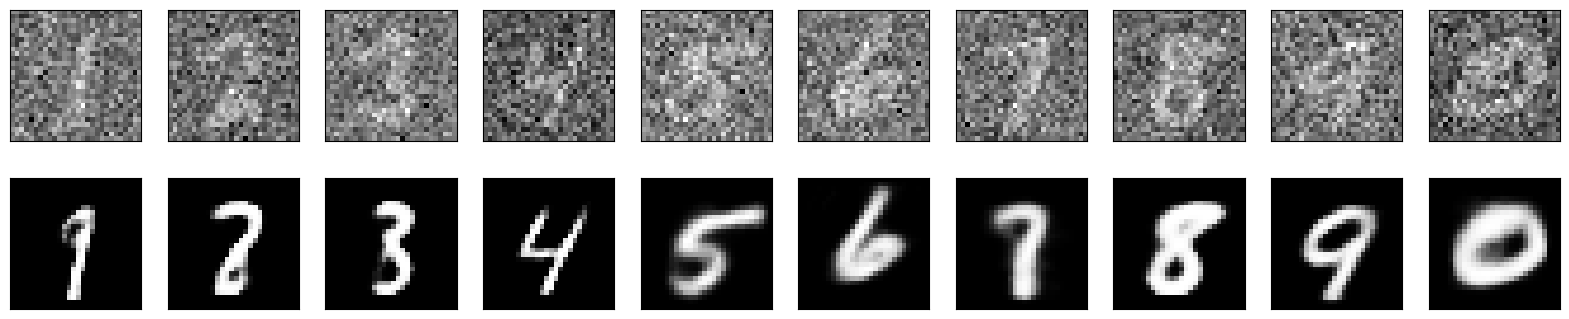

Noise factor:  0.65


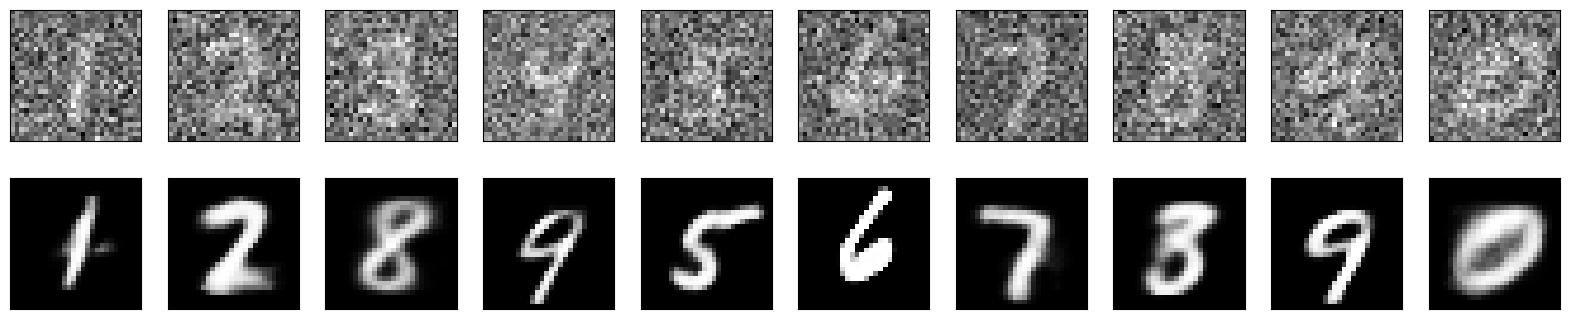

Noise factor:  0.7


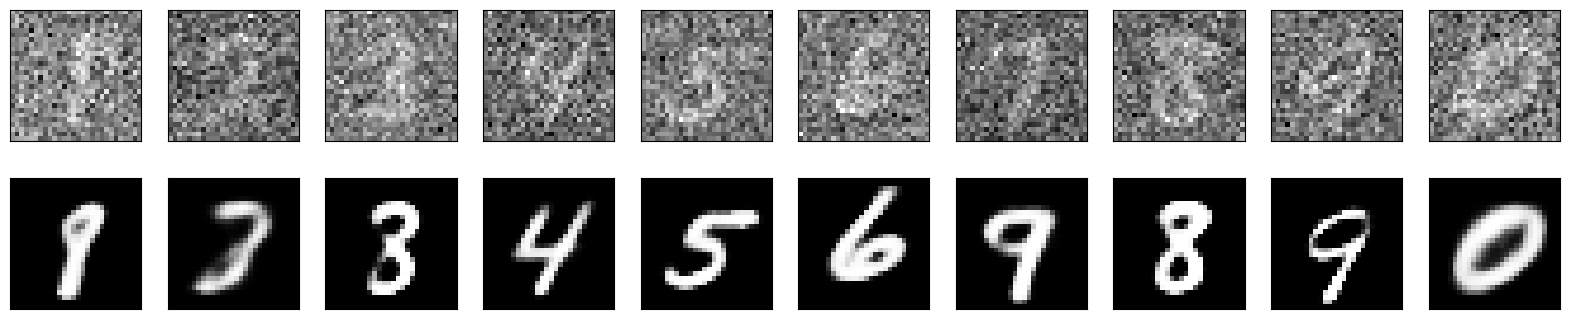

Noise factor:  0.75


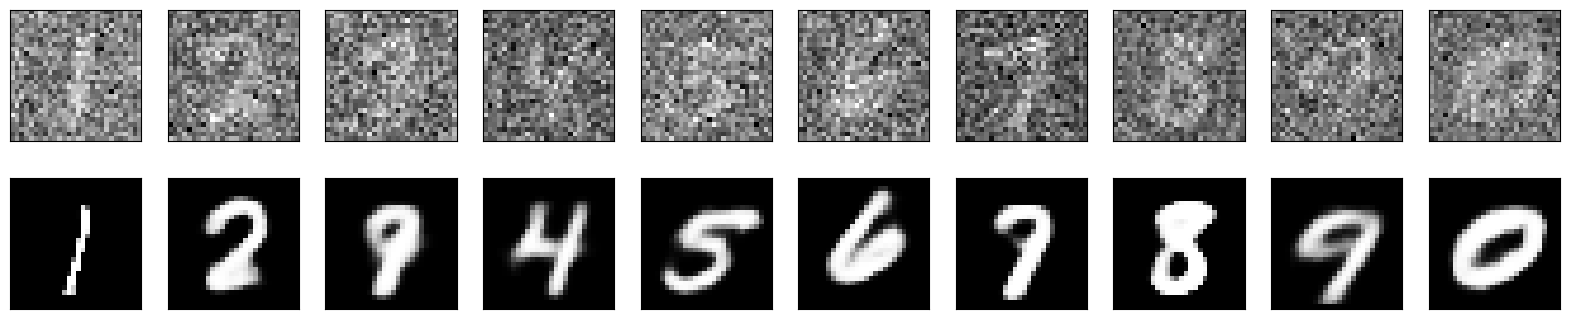

Noise factor:  0.8


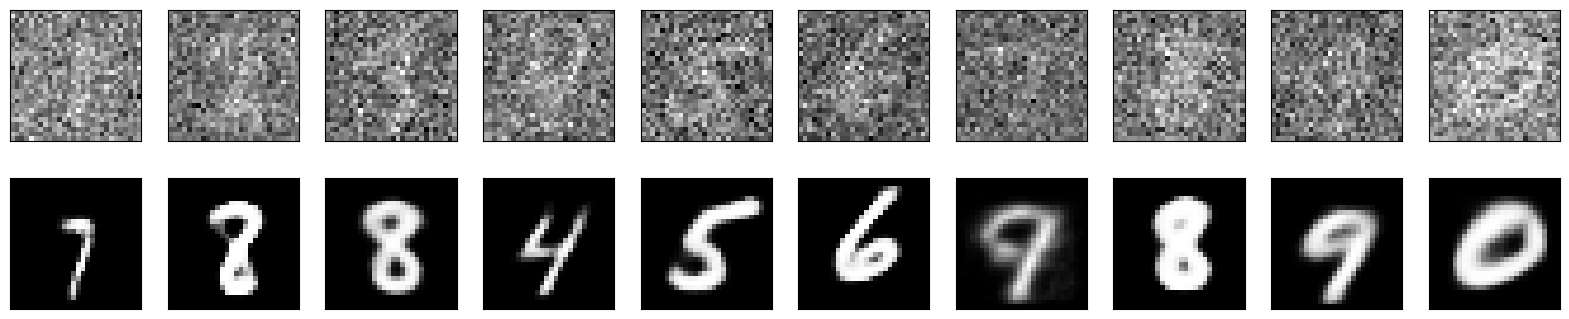

Noise factor:  0.85


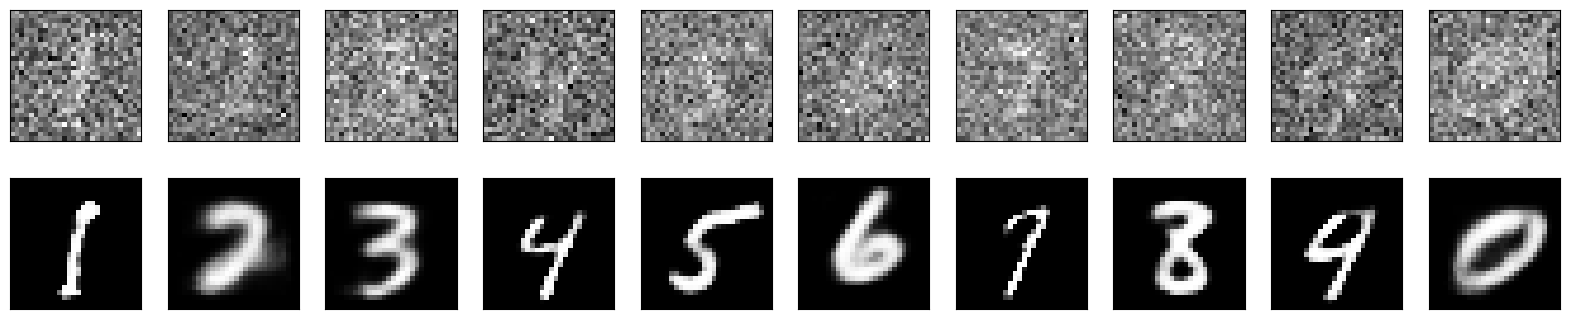

Noise factor:  0.9


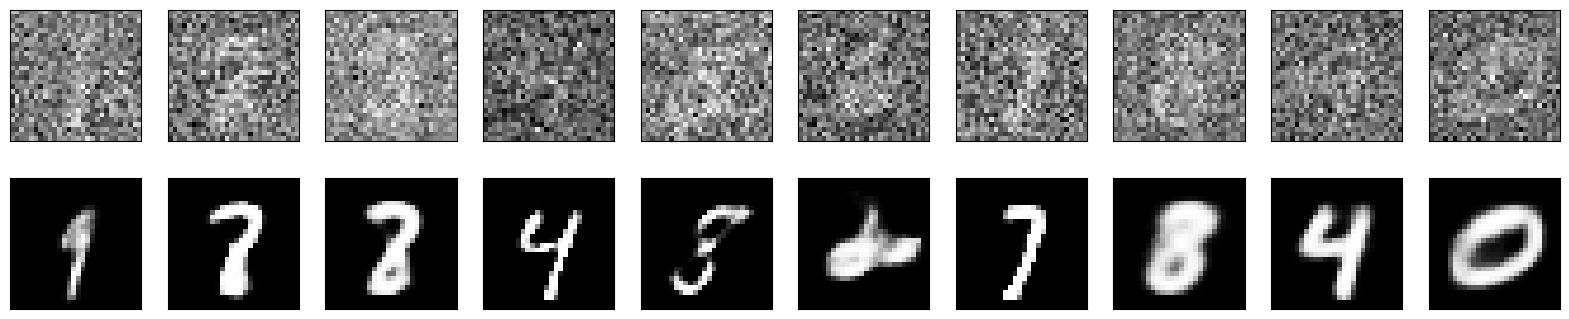

Noise factor:  0.95


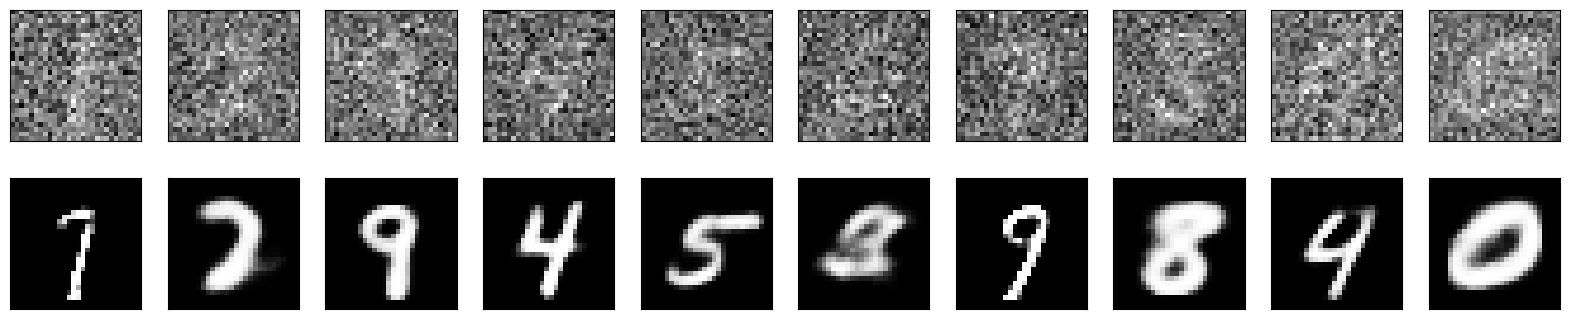

In [57]:
#visualize the results
for k in range(20):
    noise_factor = k/20
    print("Noise factor: ", noise_factor)
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        img_cpu = img.cpu()
        img_noisy =img_cpu  + noise_factor * torch.randn(img.size())
        plt.imshow(img_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i+1+n)
        model.eval()
        output = model(img_noisy.view(img.size(0), -1).to(device))
        output_cpu = output.cpu()
        plt.imshow(output_cpu[i].detach().reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
